# **Homework 4**

In [21]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

### **Problem 0**

Here, we are creating fake background data whose mean and variance depends on an offset sinusoid. Notice, it is small enough at only 100k points that we can plot it but it is messy and not informative. 

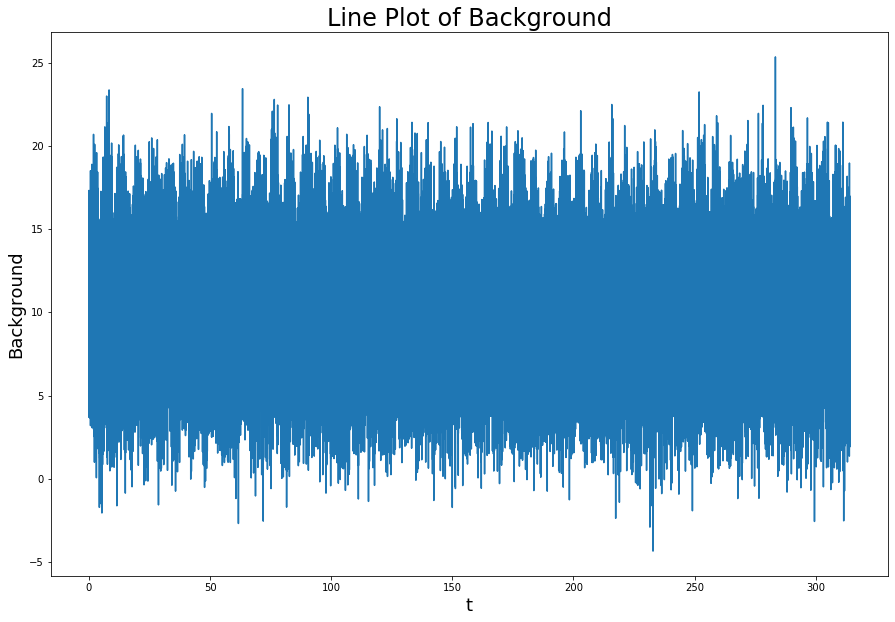

In [22]:
t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

plt.plot(t,bkgd);
plt.title("Line Plot of Background", fontsize=24);
plt.xlabel("t", fontsize=18);
plt.ylabel("Background", fontsize=18);

### **Problem 1**

Here, we will be practicing array slicing which is plotting small portions of the data. This is a special terminology used in Python but not other languages. 

**Section 1a**

Here, we will be making a scatter plot of the first 1k data points of the background. I am using plt.plot() as opposed to plt.scatter() because it is more efficient to use plt.plot() for larger data sets according to the documentation. 

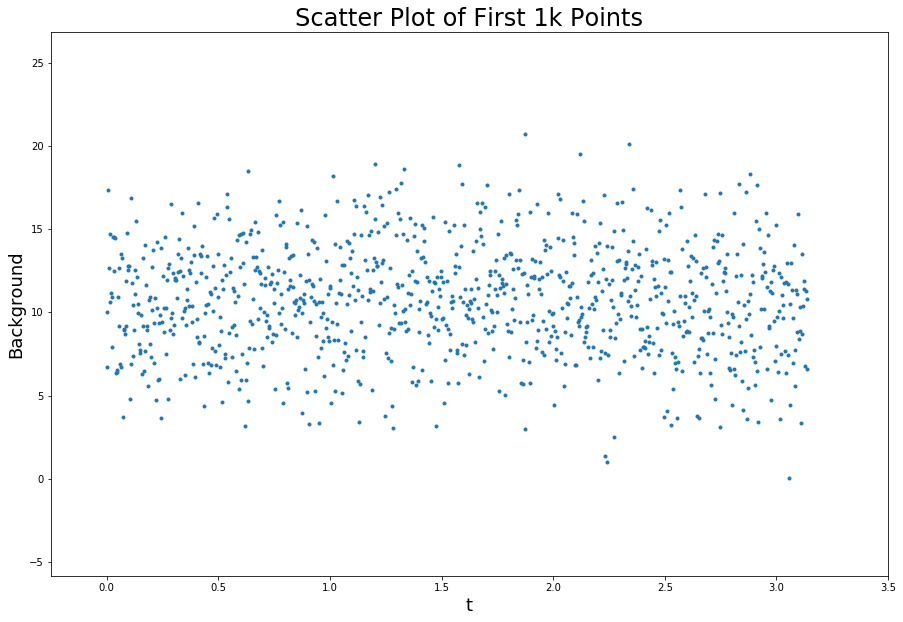

In [23]:
sp = 0 # start point
ep = 1000 # end point
space = 1 # space in between array elements
plt.plot(t,bkgd,'o',ms=3,markevery=slice(sp,ep,space));
plt.title("Scatter Plot of First 1k Points", fontsize=24);
plt.xlabel("t", fontsize=18);
plt.ylabel("Background", fontsize=18);
plt.xlim(-0.25,3.5);

**Section 1b**

Here, we want to generalize our code such that we can make of plot of any X continguous points (e.g. 2k points starting at point 500). Again, I will use plt.plot() as opposed to plt.scatter() for the reasoning from above. 

In [24]:
def genscatter(t,bkgd,sp,ep,space) :
    "This plots a scatter plot from starting to ending point with given space in between"
    plt.plot(t,bkgd,'o',ms=3,markevery=slice(sp,sp+ep,space))
    return;

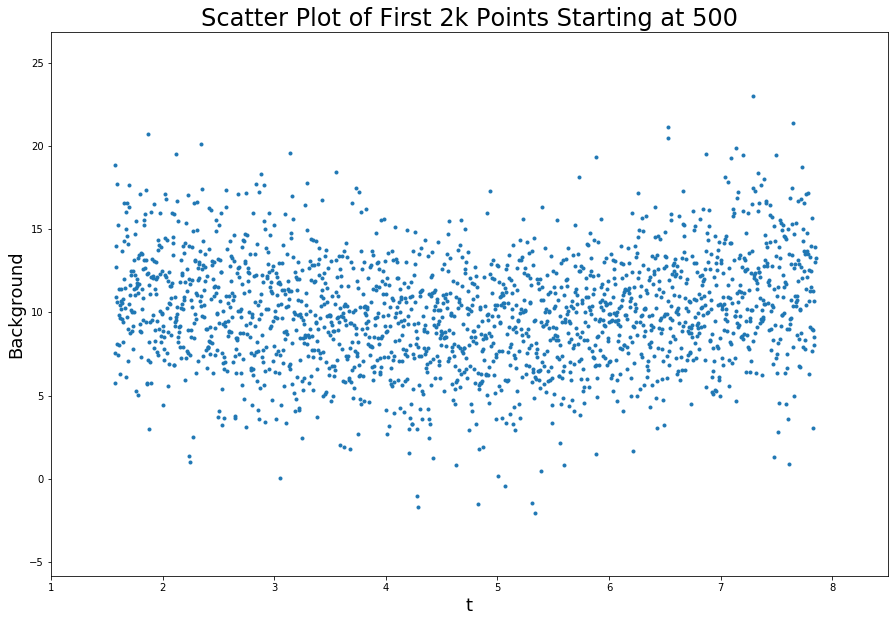

In [25]:
genscatter(t,bkgd,500,2000,1)
plt.title("Scatter Plot of First 2k Points Starting at 500", fontsize=24);
plt.xlabel("t", fontsize=18);
plt.ylabel("Background", fontsize=18);
plt.xlim(1,8.5);

**Section 1c**

Now, we want to only plot every 100th point in our full data range. Here, we can see a scatter plot more so than the other plots. This is because the points are further spaced apart so they aren't overlapping each other as much. 

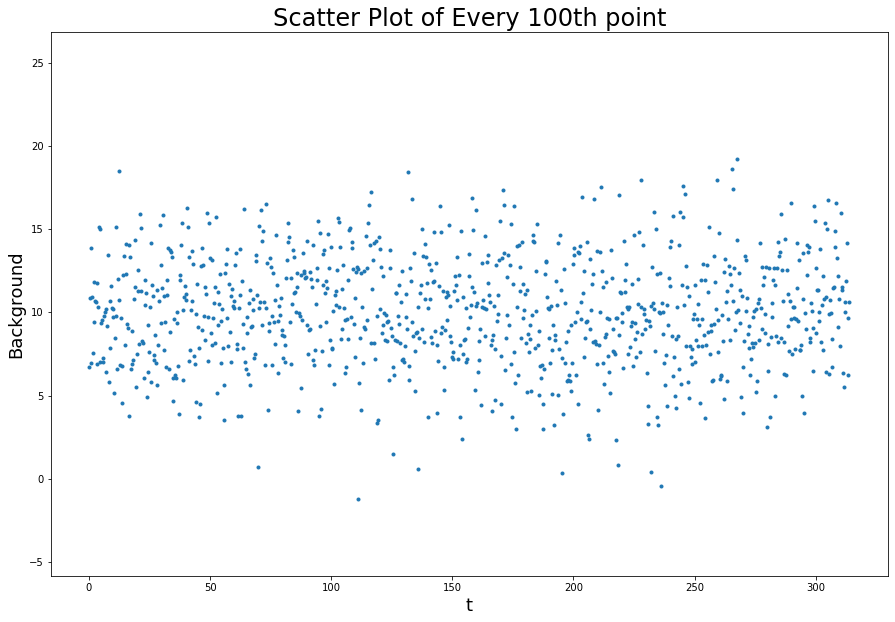

In [26]:
genscatter(t,bkgd,0,100000,100)
plt.title("Scatter Plot of Every 100th point", fontsize=24);
plt.xlabel("t", fontsize=18);
plt.ylabel("Background", fontsize=18);

### **Problem 2**

Here, we want to plot the density of the points of our fake background. The reason is because plotting 100k data points means we will get blobs in central areas since the points overlap. This gets worst as the number of data points increases. We will be using plt.hist2d() to do so.

**Section 2a**

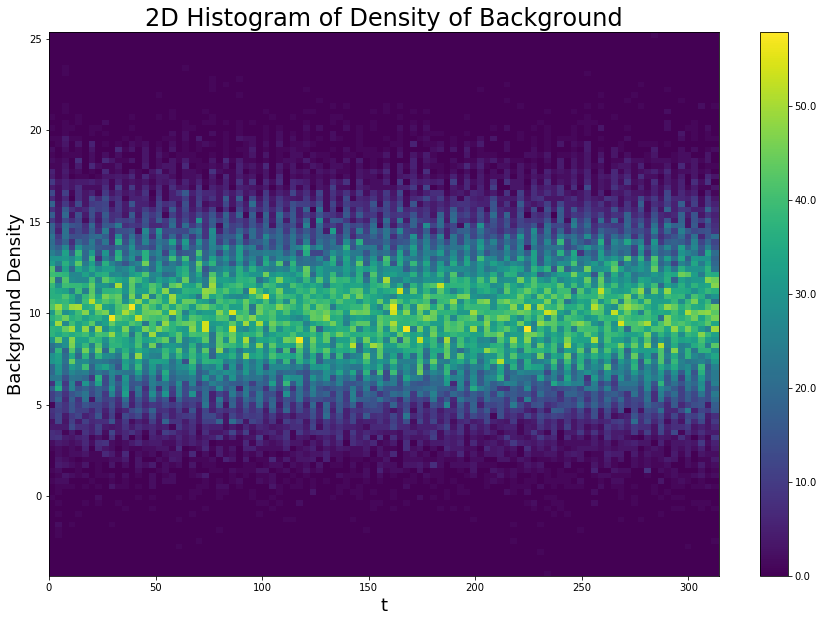

In [93]:
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(t,bkgd,bins=100, density=True);
plt.title("2D Histogram of Density of Background", fontsize = 24)
plt.ylabel("Background Density", fontsize = 18)
plt.xlabel("t", fontsize = 18)
cb = plt.colorbar(h[3],ax=ax);
cb.ax.set_yticklabels([round(i*100000) for i in cb.get_ticks()]);

**Section 2b**

Here, we are plotting the density of the points in the background. Specifically, this means we are plotting the number of points which overlap at a particular square in the scatter plot. So, the color of the square represents how many points there are in that particular square in the scatter plot. For example, a purple square represents 0 points of the data while a yellow square represents approximately 60 points of the data.

### **Problem 3**

Now, we will be practicing data folding. We will fold the data at some periodic signal to make the pattern clearer. For this problem, we will use a periodic signal of $2\pi$.

**Section 3a**

Here, we want to change our time variable by folding it at a period of $2\pi$. Now, we want to see what our entire folded data set looks like on a scatter plot.

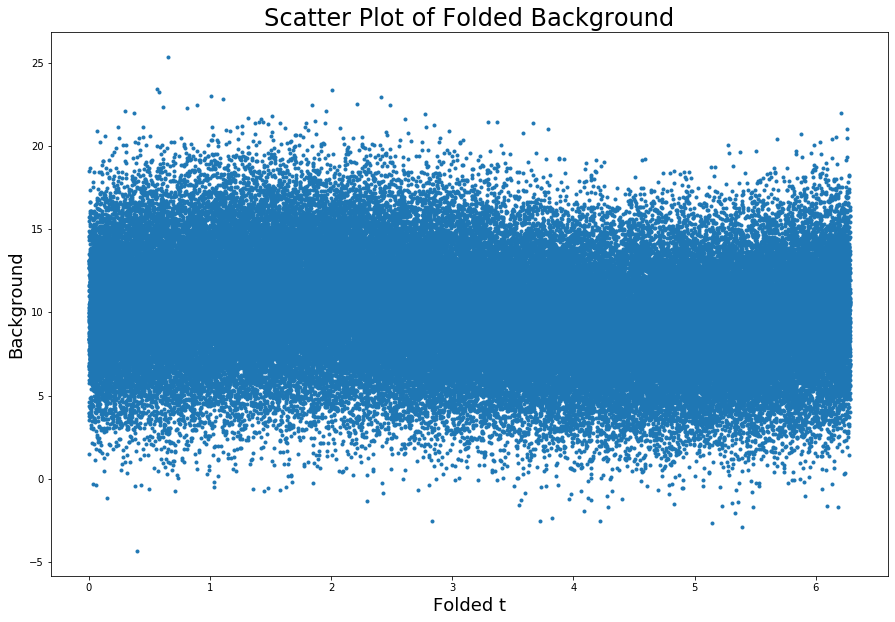

In [43]:
ft = t%(np.pi*2)

plt.plot(ft,bkgd,'o',ms=3);
plt.title("Scatter Plot of Folded Background", fontsize = 24);
plt.ylabel("Background", fontsize = 18);
plt.xlabel("Folded t", fontsize = 18);

**Section 3b**

Now, we are interested in what our folded data looks like on a 2D histogram. Here, we see some differences compared to the 2D histogram without folding. For example, the middle section is wavy instead of straight. 

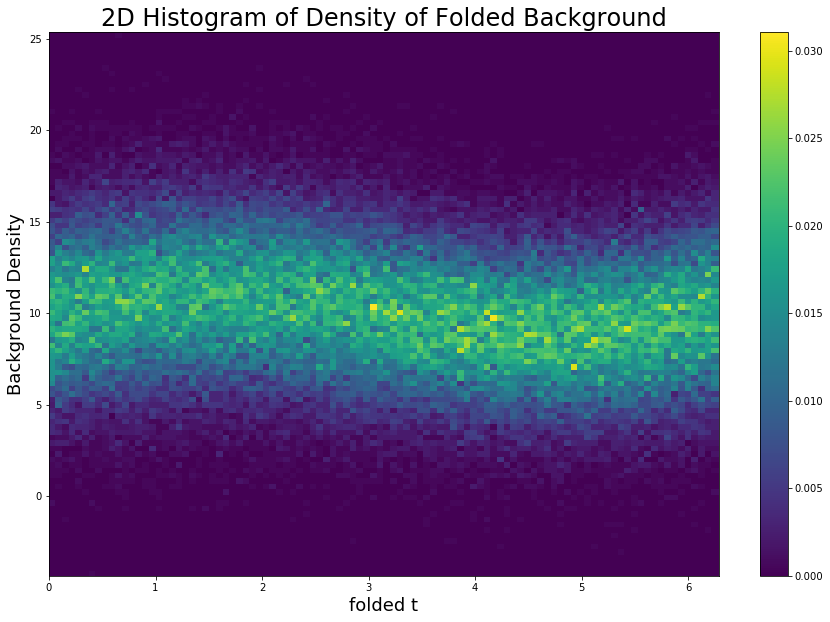

In [102]:
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(ft,bkgd,bins=100, density=True);
plt.title("2D Histogram of Density of Folded Background", fontsize = 24)
plt.ylabel("Background Density", fontsize = 18)
plt.xlabel("folded t", fontsize = 18)
fcb = plt.colorbar(h[3], ax=ax);